<a href="https://colab.research.google.com/github/fathimashanavas/Projects/blob/main/MLPROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                                   Fraud Detection in Financial Transactions Using Machine Learning Techniques



## Introduction

Fraud represents a significant challenge for financial institutions in the modern financial world. As transactions become increasingly complex and digital financial services expand, detecting fraudulent activities has become more crucial for banks, credit card companies, and financial institutions. Fraud detection is the process of identifying suspicious activities that deviate from the norm and may indicate fraudulent behavior. Despite the implementation of advanced security measures, fraudulent transactions remain a persistent issue due to the evolving tactics of fraudsters and the vast volume of transactions that must be analyzed. Consequently, there is an urgent need for effective automated systems that can detect fraudulent transactions in real-time. Leveraging advanced techniques such as machine learning, these systems aim to improve the accuracy and efficiency of fraud detection mechanisms.



## Objectives

* To develop a predictive model that can classify transactions as either
  fraudulent or non-fraudulent with high accuracy.
* To explore and compare various machine learning algorithms to identify the
  most effective approach for fraud detection.
* To evaluate the performance of different models using metrics such as
  accuracy, precision, recall, and F1-score to determine their effectiveness in detecting fraud.
* To identify and analyze key features that contribute to the detection of
  fraudulent activities and enhance the robustness of the fraud detection model.




## Methodology

### 1.Data Collection

Data for this project is obtained from Kaggle, which includes transaction records with features such as transaction type, amount, and account balances.

Dataset link:https://www.kaggle.com/code/sagarvarandekar/eda-fraud-detection-by-classification-algorithms/input

### 2.Data Preprocessing

* Data Cleaning: Handling missing values and removing duplicates.
* Feature Engineering: Creating new features, such as transaction frequency or
  balance changes.
* Feature Selection: Identifying and selecting the most relevant features for
  the model.






### 3.Model Selection

Several machine learning algorithms will be tested, including:
* LogistiC Regression
* Naive Bayes Classifiers
* Random Forest Classifier





### 4.Evaluation Metrics

The models will be evaluated using:
* Accuracy: The proportion of correctly classified transactions.
* Precision: The proportion of actual fraudulent transactions among predicted
  fraudulent transactions.
* Recall: The proportion of actual fraudulent transactions correctly identified
  by the model.
* F1-Score: The harmonic mean of precision and recall.
* Confusion Matrix: To visualize the performance of the model.






### 5.Implementation Tools

* Programming Languages: Python
* Libraries: Scikit-Learn, Pandas, NumPy, Matplotlib, Seaborn




## Code Implementation

### Importing required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,accuracy_score,f1_score,recall_score,average_precision_score,precision_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/DataSet/Fraud.csv')
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


### Defining the each attributes

* Step:Represents the time step or the sequence of the transaction.  
  Transactions are ordered by these steps, which could indicate different time intervals or events.
* Type:Specifies the type of financial transaction. Different types of
  transactions might have different patterns of fraud.

  possible values:
  * PAYMENT: A transaction where money is paid out.
  * CASH_OUT: A transaction where money is withdrawn.
  * TRANSFER: A transaction where money is transferred from one account
    to another.
  * CASH_IN: A transaction where money is deposited into an account.
  * DEBIT: A transaction where money is debited from an account.

* Amount: The amount of money involved in the transaction.
* oldbalanceorg: The balance in the original account before the transaction.
* newbalanceOrig: The balance in the original account after the transaction.
* oldbalanceDest: The balance in the destination account before the transaction
  (only relevant for TRANSFER and CASH_OUT types).
* newbalanceDest: The balance in the destination account after the transaction
  (only relevant for TRANSFER and CASH_OUT types)
* isFraud: A binary indicator of whether the transaction is fraudulent or not.
* isFlaggedFraud: A binary indicator for whether the transaction was flagged as
  fraudulent by a preliminary check.
* nameOrig and nameDest: These attributes represent the identifiers for the
  origin and destination accounts. They are generally unique to each account and can be used to trace the transactions between different accounts.







### Viewing dataframe

In [ ]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


### Checking count of Fraud and Non-Fraud Transactions

In [ ]:
df['isFlaggedFraud'].value_counts()


isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [ ]:
df['isFraud'].value_counts()


isFraud
0    6354407
1       8213
Name: count, dtype: int64

### Checking missing values

In [ ]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

### Checking duplicate rows

In [ ]:
df.duplicated().sum()

0

There is no missing values and duplicate values

In [ ]:
list(df.columns)


['step',
 'type',
 'amount',
 'nameOrig',
 'oldbalanceOrg',
 'newbalanceOrig',
 'nameDest',
 'oldbalanceDest',
 'newbalanceDest',
 'isFraud',
 'isFlaggedFraud']

In [ ]:
df.shape

(6362620, 11)

### checking datatypes

In [ ]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [ ]:
type=df['type'].value_counts()
type

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

### Proportion of type of Transactions

[]

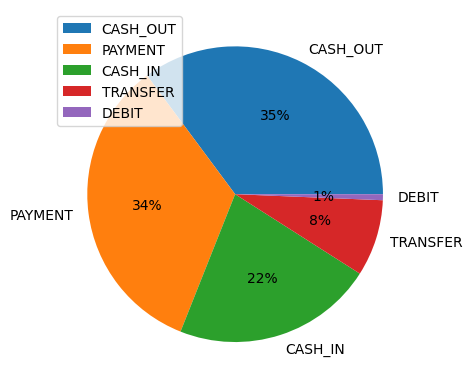

In [ ]:
counts=type
types=['CASH_OUT','PAYMENT','CASH_IN','TRANSFER','DEBIT']
plt.pie(counts,labels=types,autopct='%1.0f%%')
plt.legend(loc='upper left')
plt.plot()

### Count of Fraud and Non-Fraud Transactions in each type of Transaction

<Axes: xlabel='type', ylabel='count'>

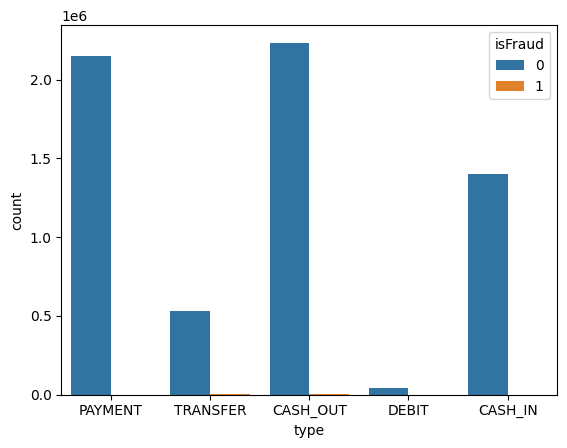

In [ ]:
sns.countplot(x='type',data=df,hue='isFraud')

* Transaction types TRANSFER and CASH_OUT only have FRAUD Transactions.
* DEBIT Transactions are only few and TRANSFER type Transactions are also  
  less compared to other type of transactions.
* No of Fraud transactions of TRANSFER type are very close to no of CASH_OUT
  FRAUD transactions.

  



### Showing the  fraud transactions in TRANSFER and CASH_OUT type transactions.

In [ ]:
fraud = df[df["isFraud"] == 1]
fraud_transfer = fraud[fraud["type"] == "TRANSFER"]
fraud_cashout = fraud[fraud["type"] == "CASH_OUT"]

In [ ]:
fraud_transfer

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.0,0.0,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.0,0.0,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.0,0.0,1,0
969,1,TRANSFER,1277212.77,C1334405552,1277212.77,0.0,C431687661,0.0,0.0,1,0
1115,1,TRANSFER,35063.63,C1364127192,35063.63,0.0,C1136419747,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.0,C1812552860,0.0,0.0,1,0
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.0,0.0,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.0,0.0,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.0,0.0,1,0


In [ ]:
fraud_cashout

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
681,1,CASH_OUT,20128.00,C1118430673,20128.00,0.0,C339924917,6268.00,12145.85,1,0
724,1,CASH_OUT,416001.33,C749981943,0.00,0.0,C667346055,102.00,9291619.62,1,0
970,1,CASH_OUT,1277212.77,C467632528,1277212.77,0.0,C716083600,0.00,2444985.19,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362611,742,CASH_OUT,63416.99,C994950684,63416.99,0.0,C1662241365,276433.18,339850.17,1,0
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,0
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0


Visualizing Numeric variables against Fraud using Boxplots.

Text(0.5, 1.0, 'oldbalanceDest vs Fraud')

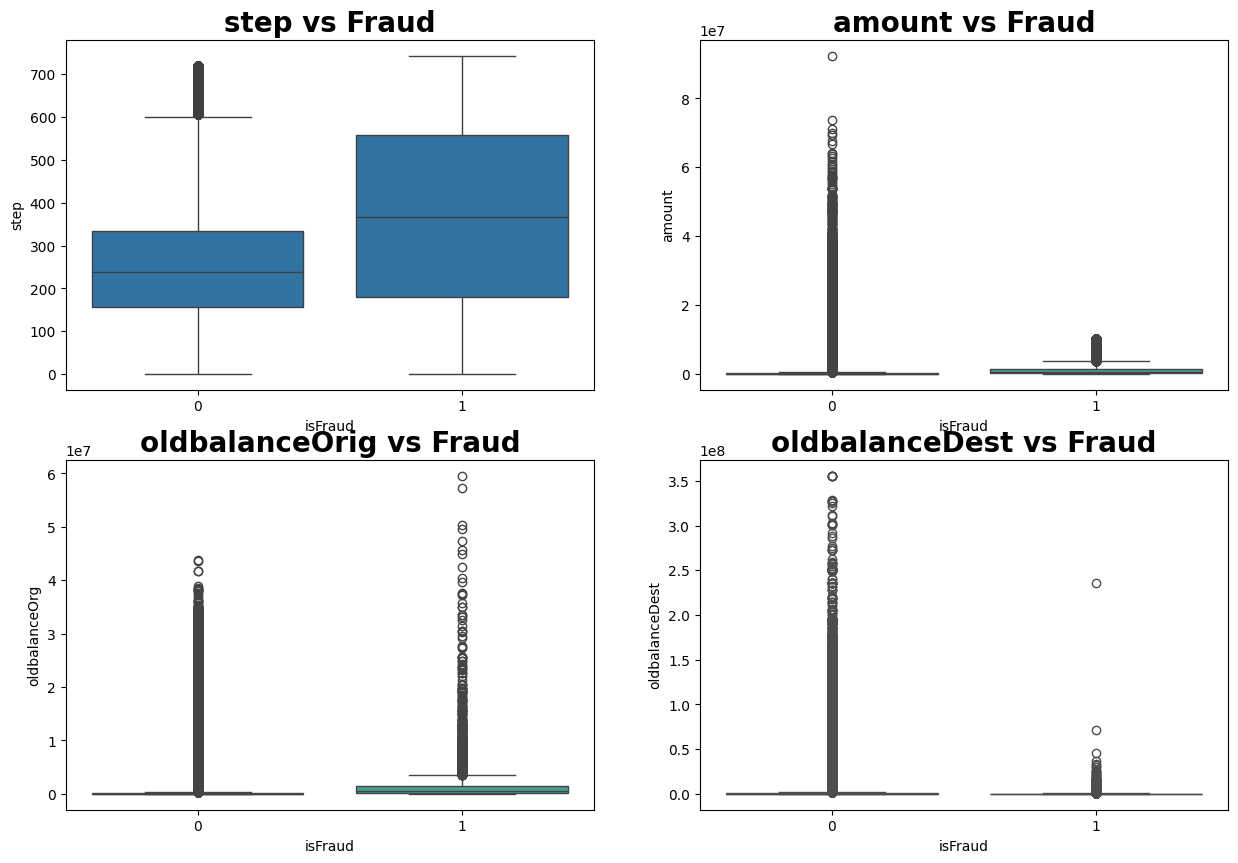

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplot(2,2,1)
sns.boxplot(x = 'isFraud', y = 'step', data = df)
plt.title('step vs Fraud',fontweight="bold", size=20)
plt.subplot(2,2,2)
sns.boxplot(x = 'isFraud', y = 'amount', data = df,palette="husl")
plt.title('amount vs Fraud',fontweight="bold", size=20)
plt.subplot(2,2,3)
sns.boxplot(x = 'isFraud', y = 'oldbalanceOrg', data = df, palette= 'husl')
plt.title('oldbalanceOrig vs Fraud',fontweight="bold", size=20)
plt.subplot(2,2,4)
sns.boxplot(x = 'isFraud', y = 'oldbalanceDest', data =df,palette="bright")
plt.title('oldbalanceDest vs Fraud',fontweight="bold", size=20)

* Median amount for fraud transactions is greater than Non Fraud transactions.
* Fraudulent transactions show greater variability and a higher number of
  extreme values (outliers), which may point to irregular transaction patterns often associated with fraud.










### Droping(deleting) the we don't need for the preprocessing

In [ ]:
df.drop(['nameOrig'],axis=1,inplace=True)
df.drop(['nameDest'],axis=1,inplace=True)
df.drop(['isFlaggedFraud'],axis=1,inplace=True)


### Changing the datatype of the column 'type' using labelencoder
A label encoder is a tool used in machine learning to convert categorical data into numerical data.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['type']=le.fit_transform(df['type'])

### taking attributes(input)

In [ ]:
X=df.iloc[:,:-1]
X

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,3,9839.64,170136.00,160296.36,0.00,0.00
1,1,3,1864.28,21249.00,19384.72,0.00,0.00
2,1,4,181.00,181.00,0.00,0.00,0.00
3,1,1,181.00,181.00,0.00,21182.00,0.00
4,1,3,11668.14,41554.00,29885.86,0.00,0.00
...,...,...,...,...,...,...,...
6362615,743,1,339682.13,339682.13,0.00,0.00,339682.13
6362616,743,4,6311409.28,6311409.28,0.00,0.00,0.00
6362617,743,1,6311409.28,6311409.28,0.00,68488.84,6379898.11
6362618,743,4,850002.52,850002.52,0.00,0.00,0.00


### taking output

In [ ]:
y=df.iloc[:,-1]
y

0          0
1          0
2          1
3          1
4          0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 6362620, dtype: int64

### Scaling using Minmaxscaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[0.00000000e+00, 7.50000000e-01, 1.06437179e-04, ...,
        3.23275647e-03, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 7.50000000e-01, 2.01662565e-05, ...,
        3.90938877e-04, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 1.95790998e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.00000000e+00, 2.50000000e-01, 6.82716643e-02, ...,
        0.00000000e+00, 1.92375796e-04, 1.79120417e-02],
       [1.00000000e+00, 1.00000000e+00, 9.19463216e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 2.50000000e-01, 9.19463216e-03, ...,
        0.00000000e+00, 1.82859791e-02, 2.06640365e-02]])

### Splitting data to train data and test data

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=1)

In [ ]:
X_train.shape

(4453834, 7)

In [ ]:
y_train.shape

(4453834,)

From the boxplots, it's clear that fraudulent transactions not only differ in their distribution but also in their monetary values compared to non-fraudulent transactions.This datasets typically exhibit a high imbalance, with a significantly higher number of non-fraudulent transactions. This imbalance can skew the performance of our fraud detection model, making it less sensitive to identifying fraud.

Undersampling is a technique used to address this class imbalance by reducing the number of non-fraudulent transactions to match the number of fraudulent ones. This balanced dataset will help in training a model that treats both classes with equal importance, improving its ability to detect fraud effectively.

In [ ]:
undersampler=RandomUnderSampler(random_state=1)
X_us,y_us=undersampler.fit_resample(X_scaled,y)

In [ ]:
X_train_us,X_test_us,y_train_us,y_test_us=train_test_split(X_us,y_us,test_size=0.3,random_state=1)

## Logistic Regression

In [ ]:
model_lr=LogisticRegression(C=100,max_iter=100,multi_class='ovr',penalty='l1',solver='liblinear')
model_lr.fit(X_train_us,y_train_us)

LogisticRegression(C=100, multi_class='ovr', penalty='l1', solver='liblinear')

In [ ]:
y_pred_us_lr=model_lr.predict(X_test_us)
y_pred_us_lr

array([0, 0, 1, ..., 0, 1, 1])

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2456
           1       0.96      0.87      0.91      2472

    accuracy                           0.91      4928
   macro avg       0.92      0.91      0.91      4928
weighted avg       0.92      0.91      0.91      4928

Accuracy_score: 0.9145698051948052
Precision: 0.9584264640143049
Recall: 0.8673139158576052
F1: 0.910596729666596


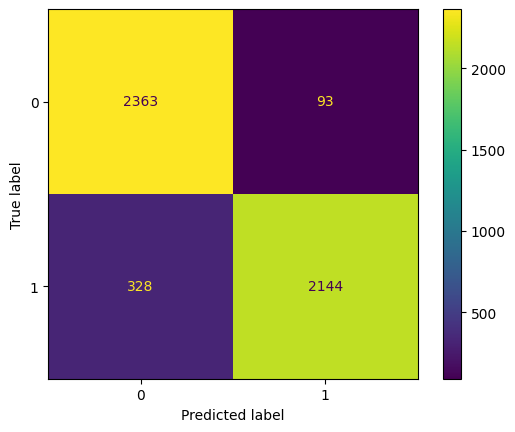

In [ ]:
print(classification_report(y_test_us,y_pred_us_lr))
print(ConfusionMatrixDisplay.from_predictions(y_test_us,y_pred_us_lr))
print("Accuracy_score:", accuracy_score(y_test_us,y_pred_us_lr))
print("Precision:", precision_score(y_test_us, y_pred_us_lr))
print("Recall:", recall_score(y_test_us, y_pred_us_lr))
print("F1:", f1_score(y_test_us, y_pred_us_lr))

## Bernoulli Naive Bayes

In [ ]:
model_bn=BernoulliNB(alpha=1.0, binarize=0.0, fit_prior=True)
model_bn.fit(X_train_us,y_train_us)

BernoulliNB()

In [ ]:
y_pred_us_bn=model_bn.predict(X_test_us)
y_pred_us_bn

array([0, 1, 1, ..., 0, 1, 1])

              precision    recall  f1-score   support

           0       0.97      0.77      0.86      2456
           1       0.81      0.98      0.88      2472

    accuracy                           0.87      4928
   macro avg       0.89      0.87      0.87      4928
weighted avg       0.89      0.87      0.87      4928

Accuracy_score: 0.8719561688311688
Precision: 0.8087889969808789
Recall: 0.9753236245954693
F1: 0.8842838804327893


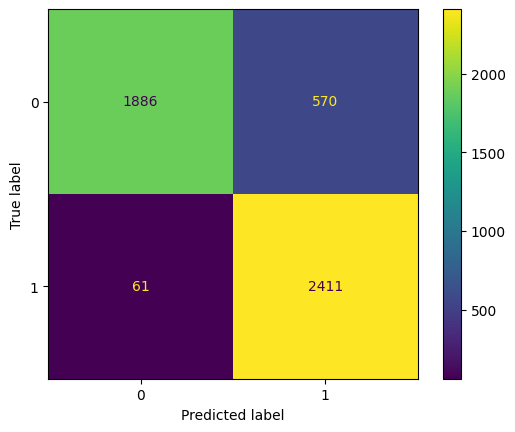

In [ ]:
print(classification_report(y_test_us,y_pred_us_bn))
print(ConfusionMatrixDisplay.from_predictions(y_test_us,y_pred_us_bn))
print("Accuracy_score:", accuracy_score(y_test_us,y_pred_us_bn))
print("Precision:", precision_score(y_test_us, y_pred_us_bn))
print("Recall:", recall_score(y_test_us, y_pred_us_bn))
print("F1:", f1_score(y_test_us, y_pred_us_bn))

## Multinomial Naive Bayes

In [ ]:
model_mn=MultinomialNB(alpha=1.0, fit_prior=True)
model_mn.fit(X_train_us,y_train_us)

MultinomialNB()

In [ ]:
y_pred_us_mn=model_mn.predict(X_test_us)
y_pred_us_mn

array([1, 1, 1, ..., 0, 1, 1])

              precision    recall  f1-score   support

           0       0.79      0.63      0.70      2456
           1       0.69      0.83      0.75      2472

    accuracy                           0.73      4928
   macro avg       0.74      0.73      0.73      4928
weighted avg       0.74      0.73      0.73      4928

Accuracy_score: 0.7282873376623377
Precision: 0.6905482677430205
Recall: 0.8305016181229773
F1: 0.7540863177226812


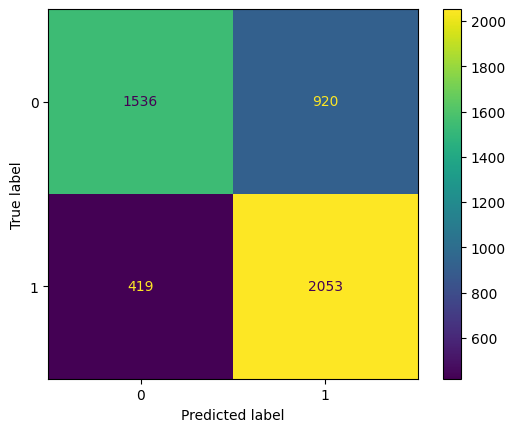

In [ ]:
print(classification_report(y_test_us,y_pred_us_mn))
print(ConfusionMatrixDisplay.from_predictions(y_test_us,y_pred_us_mn))
print("Accuracy_score:", accuracy_score(y_test_us,y_pred_us_mn))
print("Precision:", precision_score(y_test_us, y_pred_us_mn))
print("Recall:", recall_score(y_test_us, y_pred_us_mn))
print("F1:", f1_score(y_test_us, y_pred_us_mn))

## Random Forest Classifier

In [ ]:
model_rf=RandomForestClassifier(n_estimators=15,oob_score=True,class_weight='balanced',n_jobs=-1)
model_rf.fit(X_train_us,y_train_us)

RandomForestClassifier(class_weight='balanced', n_estimators=15, n_jobs=-1,
                       oob_score=True)

In [ ]:
y_pred_us_rf=model_rf.predict(X_test_us)
y_pred_us_rf

array([0, 0, 1, ..., 0, 1, 1])

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2456
           1       0.98      1.00      0.99      2472

    accuracy                           0.99      4928
   macro avg       0.99      0.99      0.99      4928
weighted avg       0.99      0.99      0.99      4928

Accuracy_score: 0.9890422077922078
Precision: 0.9832134292565947
Recall: 0.9951456310679612
F1: 0.9891435464414958


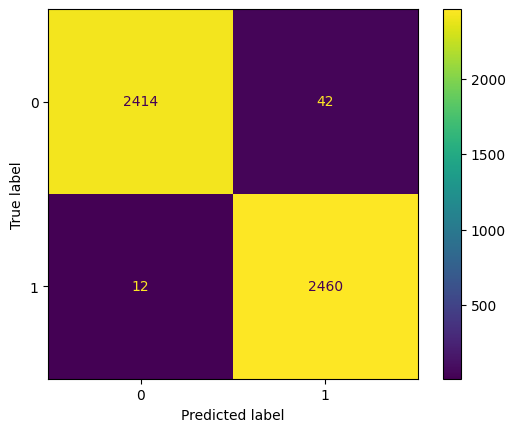

In [ ]:
print(classification_report(y_test_us,y_pred_us_rf))
print(ConfusionMatrixDisplay.from_predictions(y_test_us,y_pred_us_rf))
print("Accuracy_score:", accuracy_score(y_test_us,y_pred_us_rf))
print("Precision:", precision_score(y_test_us, y_pred_us_rf))
print("Recall:", recall_score(y_test_us, y_pred_us_rf))
print("F1:", f1_score(y_test_us, y_pred_us_rf))

## Result

When we compare confusion matrices of all the classifiers we observe that RandomForest Classifier does a very good work detecting Fraud Transactions.The closest model in detecting fraud transactions is Bernoulli Naive Bayes but it still leaves more Fraud transactions from Train and Test data undetected and also it misclassifies considerable Non-Fraud transactions as Fraud which is very undesirable.RandomForest does misclassify some nonFraud transactions as Fraud but it is less than 0.5% of all non Fraud transactions which is fine if less than 0.5% of nonFraud transactions fail in an attempt to detect 98% Fraud transactions.

Thus RANDOM FOREST CLASSIFIER best in detecting fraud transactions.

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2456
           1       0.98      1.00      0.99      2472

    accuracy                           0.99      4928
   macro avg       0.99      0.99      0.99      4928
weighted avg       0.99      0.99      0.99      4928

Accuracy_score: 0.9888392857142857
Precision: 0.982820615261686
Recall: 0.9951456310679612
F1: 0.9889447236180904


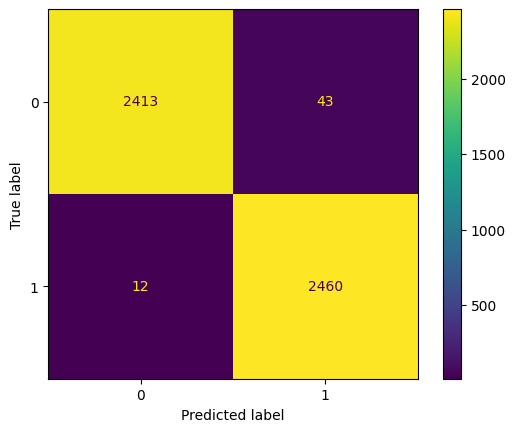

In [ ]:
print(classification_report(y_test_us,y_pred_us_rf))
print(ConfusionMatrixDisplay.from_predictions(y_test_us,y_pred_us_rf))
print("Accuracy_score:", accuracy_score(y_test_us,y_pred_us_rf))
print("Precision:", precision_score(y_test_us, y_pred_us_rf))
print("Recall:", recall_score(y_test_us, y_pred_us_rf))
print("F1:", f1_score(y_test_us, y_pred_us_rf))